# Convolution

- 합성곱 신경망은 완전 연결 신경망(Dense)보다 훨씬 가중치가 작으면서도 이미지 분류 문제를 더 잘 해결한다.
- CNN이라고 부르는 신경망을 말한다.
- Dense VS Conv 에서는 어떤 기준이 있는지 조사가 필요하다.

# CNN의 구현

In [1]:
import numpy as np

In [2]:
w = np.array([2,1,5,3])
x = np.array([2,8,3,7,1,2,0,4,5])

In [11]:
# flip으로 Reverse 데이터 생성.
w_r = np.flip(w)
# w_r = w[::-1] 이걸로도 뒤집을 수 있다.

In [12]:
w_r

array([3, 5, 1, 2])

## Conv 연산 (Dot, Convolve)

In [13]:
# By 'Dot mupliplying '

for i in range(6):
    print(np.dot(x[i:i+4],w_r))
    # x4개 * w_r 과 원소별로 곱함 dot 곱셈 연산

63
48
49
28
21
20


In [14]:
from scipy.signal import convolve 
convolve(x,w,mode='valid')

array([63, 48, 49, 28, 21, 20])

- 실제로는 교차상관을 이용함. Correlate 사용으로 참고.

In [15]:
from scipy.signal import correlate
correlate(x,w,mode='valid')

array([48, 57, 24, 25, 16, 39])

## Padding And Stride

- Padding : 원본 배열의 양 끝에 원소를 추가하는 것을 말한다.
- Stride : 미끄러지는 배열의 간격을 조절하는 것을 말한다.

In [16]:
correlate(x,w,mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

- Padding 은 양쪽 끝 원소가 계산 참여횟수가 적기 때문에 양끝에 '0'를 추가해서 계산하기때문에 Padding이라고 불린다.
- 이러한 Padding은 길이에 따라 Same Padding 과 Full Padding으로 나뉘는데.
- Full Padding은 최대한 0를 붙여놓은 그림이고
- Same Padding은 위에서 설정한 'x'와 같은 길이임.

- Stride는 이 연산을 1칸씩 움직이는 것이 아니라 2칸 3칸 움직일 때 사용 -> 미끄러지는 간격을 조정한다.

## 2차원

In [18]:
x=np.array([[1,2,3],[4,5,6],[7,8,9]])

w = np.array([[2,0],[0,0]])

from scipy.signal import correlate2d
correlate2d(x,w,mode='valid')

array([[ 2,  4],
       [ 8, 10]])

- 2차원의 Same Padding은 x에서 오른쪽과 아래쪽에 0이 Padding 으로 주가되어 4 * 4 형태로 된다.

In [19]:
correlate2d(x,w,mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

## Tensorflow에서의 Convolve

- Tensorflow에서 2차원 합성곱을 수행하는 함수는 conv2d() 이고. 입력으로 4차원을 입력해야한다.
- 왜냐하면, 입력 이미지의 높이와 너비 외에 더 많은 차원이 필요하기 때문임.

In [20]:
import tensorflow as tf
x_4d = x.astype(np.float).reshape(1,3,3,1)
w_4d = w.reshape(2,2,1,1)

C:\Users\user\AppData\Local\Temp\ipykernel_5476\114536522.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_4d = x.astype(np.float).reshape(1,3,3,1)


- (1,3,3,1) -> (입력의 배치, 입력의 높이, 입력의 너비, 필터의 개수)
- 필터의 개수는 사진에서 RGB 값
- 가중치의 경우 (2,2,1,1) -> (가중치의 높이, 가중치의 너비, 채널(RGB), 가중치의 개수)

- ? 가중치의 개수는 사실 입력의 배치와 유사한 개념이라고 볼 수 있는가

In [21]:
c_out = tf.nn.conv2d(x_4d,w_4d, strides=1,padding='SAME')
# SAME Padding에서 SAME을 대문자로 입력해야한다 함.

In [22]:
c_out.numpy().reshape(3,3)

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]])

In [23]:
x_4d

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]])

# 풀링 연산

- 특성 맵을 스캔하며 Max값을 고르거나 Average값을 계산하는 것을 말한다.

In [24]:
x= np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])

x=x.reshape(1,4,4,1)

In [27]:
p_out=tf.nn.max_pool2d(x,ksize=2,strides=2,padding='VALID')
p_out.numpy().reshape(2,2)

array([[ 6.,  8.],
       [14., 16.]], dtype=float32)

# 케라스로 Convolve

In [30]:
(X_train_all, y_train_all), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all,stratify=y_train_all, test_size=0.2,random_state=42)

In [33]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [34]:
X_train.shape

(48000, 28, 28)

- 28 * 28의 데이터이고 채널에 대한 값이 설정되어 있지는 않지만, 채널이 있게 조정한다.

In [35]:
X_train = X_train.reshape(-1,28,28,1)

In [36]:
X_val = X_val.reshape(-1,28,28,1)

In [37]:
X_train.shape

(48000, 28, 28, 1)

## Normalize Data

In [39]:
X_train = X_train/255
X_val = X_val/255

## Keras

In [40]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense

### Conv Layer

In [42]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))

### Pool Layer

In [43]:
conv1.add(MaxPooling2D((2,2)))
#strides 를 지정할 수 있지만 Default 는 커널의 크기임 즉 절반 크기로 줄어들 것임
#Padding 도 지정할 수 있고 Default : valid이다.

- Pooling 이후에 완전 연결층을 연결하기 위해 배치 차원을 제외하고 일렬로 펼쳐야하기 때문에 Flatten 클래스가 사용된다.

In [44]:
conv1.add(Flatten())

In [45]:
conv1.add(Dense(100,activation='relu'))
conv1.add(Dense(10,activation='softmax'))

In [46]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
__________________________________________________

In [47]:
conv1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [48]:
history=conv1.fit(X_train, y_train_encoded, epochs=20, validation_data=(X_val,y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 36s 22ms/step - loss: 0.4549 - accuracy: 0.8371 - val_loss: 0.3565 - val_accuracy: 0.8686
Epoch 2/20
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3102 - accuracy: 0.8884 - val_loss: 0.2964 - val_accuracy: 0.8921
Epoch 3/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2653 - accuracy: 0.9027 - val_loss: 0.2867 - val_accuracy: 0.8951
Epoch 4/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2358 - accuracy: 0.9125 - val_loss: 0.2740 - val_accuracy: 0.9031
Epoch 5/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2116 - accuracy: 0.9217 - val_loss: 0.2599 - val_accuracy: 0.9024
Epoch 6/20
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1922 - accuracy: 0.9296 - val_loss: 0.2502 - val_accuracy: 0.9082
Epoch 7/20
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1723 - accuracy: 0.9376 - val_loss: 0.2500 -

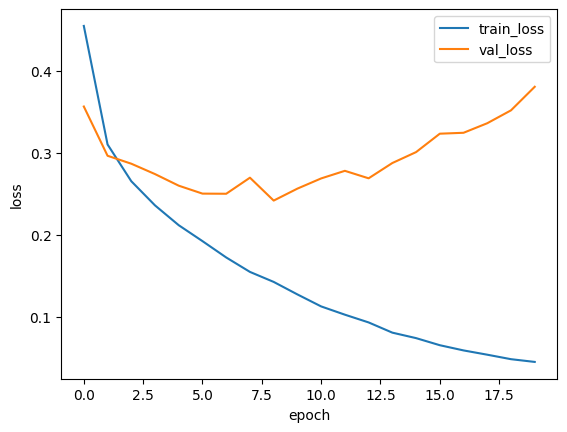

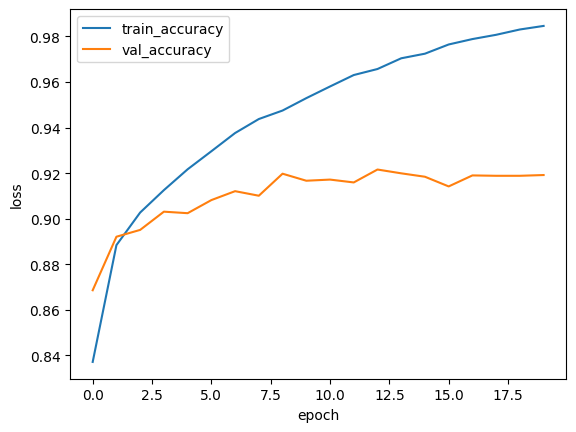

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

# Drop Out

In [52]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10,(3,3), activation='relu', padding = 'same', input_shape=(28,28,1)))
conv2.add(MaxPooling2D((2,2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10,activation='softmax'))

In [53]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               196100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [54]:
conv2.compile(optimizer='adam',loss='categorical_crossentropy', metrics = ['accuracy'])

In [55]:
history2=conv2.fit(X_train,y_train_encoded, epochs=20, validation_data=(X_val,y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 37s 24ms/step - loss: 0.4979 - accuracy: 0.8217 - val_loss: 0.3395 - val_accuracy: 0.8829
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3698 - accuracy: 0.8639 - val_loss: 0.3207 - val_accuracy: 0.8840
Epoch 3/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.3291 - accuracy: 0.8792 - val_loss: 0.2889 - val_accuracy: 0.8938
Epoch 4/20
1500/1500 [==============================] - 29s 19ms/step - loss: 0.3011 - accuracy: 0.8881 - val_loss: 0.2679 - val_accuracy: 0.9029
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2822 - accuracy: 0.8942 - val_loss: 0.2744 - val_accuracy: 0.8988
Epoch 6/20
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2665 - accuracy: 0.9000 - val_loss: 0.2471 - val_accuracy: 0.9119
Epoch 7/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2534 - accuracy: 0.9053 - val_loss: 0.2490 -